# SVM案例实现

## 癌症识别案例

In [1]:
import sys
import os
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/Users/yangwei/Desktop/data.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


![](数据说明.jpeg)

In [3]:
'''1.探索性数据分析'''
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
"""2. 类别特征向量化"""
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
le.fit(data['diagnosis'])
data['diagnosis'] = le.transform(data['diagnosis'])

In [6]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
 """3. 提取特征"""
 # 提取所有mean 字段和label字段
data_X = data.filter(regex='_mean')
data_y = data['diagnosis']

In [8]:
data_X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


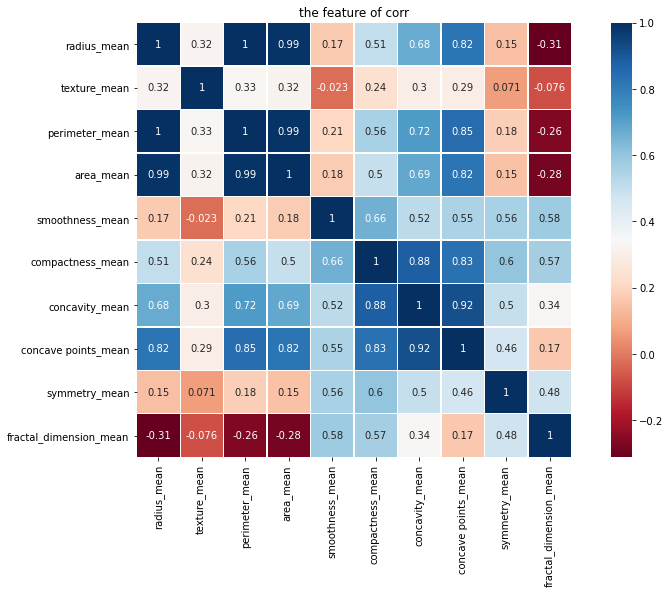

In [9]:
#热力图查看特征之间的关系
import seaborn as sns
import matplotlib.pyplot as plt   
plt.style.use({'figure.figsize':(14, 8)})
sns.heatmap(data[data_X.columns].corr(), linewidths=0.1, vmax=1.0, square=True,
            cmap=sns.color_palette('RdBu', n_colors=256),
            linecolor='white', annot=True)
plt.title('the feature of corr')
plt.show()

radius_mean、perimeter_mean和area_mean这三个特征强相关，只保留一个就行了。这里保留热力图里面得分最高的perimeter_mean。

In [10]:
data_X = data_X.drop(['radius_mean', 'area_mean'], axis=1)

In [11]:
"""5. 进行特征归一化/缩放"""
scaler = preprocessing.StandardScaler()
data_X = scaler.fit_transform(data_X)
data_X

array([[-2.07333501e+00,  1.26993369e+00,  1.56846633e+00, ...,
         2.53247522e+00,  2.21751501e+00,  2.25574689e+00],
       [-3.53632408e-01,  1.68595471e+00, -8.26962447e-01, ...,
         5.48144156e-01,  1.39236330e-03, -8.68652457e-01],
       [ 4.56186952e-01,  1.56650313e+00,  9.42210440e-01, ...,
         2.03723076e+00,  9.39684817e-01, -3.98007910e-01],
       ...,
       [ 2.04557380e+00,  6.72675785e-01, -8.40483881e-01, ...,
         1.05777359e-01, -8.09117071e-01, -8.95586935e-01],
       [ 2.33645719e+00,  1.98252415e+00,  1.52576706e+00, ...,
         2.65886573e+00,  2.13719425e+00,  1.04369542e+00],
       [ 1.22179204e+00, -1.81438851e+00, -3.11208479e+00, ...,
        -1.26181958e+00, -8.20069901e-01, -5.61032377e-01]])

In [12]:
"""6. 模型训练"""
# 切分数据集
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(data_X, data_y, test_size=0.2,random_state=5)

In [13]:
# 创建SVM分类器
from sklearn.svm import SVC
model = SVC()
# 用训练集做训练
model.fit(X_train, y_train)
# 用测试集做预测
from sklearn import metrics 
pred_label = model.predict(X_test)
print('准确率: ', metrics.accuracy_score(pred_label, y_test))

准确率:  0.9473684210526315


In [14]:
"""通过网格搜索寻找最优参数"""
from sklearn.model_selection import GridSearchCV
parameters = {'gamma': np.linspace(0.0001, 0.1),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],}
model = SVC()
grid_model = GridSearchCV(model, parameters, cv=10, return_train_score=True)
grid_model.fit(X_train, y_train)
# 用测试集做预测
pred_label = grid_model.predict(X_test)
print('准确率: ', metrics.accuracy_score(pred_label, y_test))
# 输出模型的最优参数
print(grid_model.best_params_)

准确率:  0.956140350877193
{'gamma': 0.07145714285714286, 'kernel': 'rbf'}


In [15]:
model_svm = SVC(gamma=0.07146,kernel='rbf')
model_svm .fit(X_train, y_train) 
pred_label = model_svm .predict(X_test)
print('准确率: ', metrics.accuracy_score(pred_label, y_test))

准确率:  0.956140350877193


## svm的人脸识别

In [16]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [17]:
print(__doc__)

通过网格搜索寻找最优参数


In [18]:
# 输出进度日志
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

In [19]:
# 下载数据并加载为numpy数组。
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

2020-12-08 14:33:04,289 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976012
2020-12-08 14:33:07,543 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976009
2020-12-08 14:33:10,921 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976006
2020-12-08 14:33:20,607 Downloading LFW data (~200MB): https://ndownloader.figshare.com/files/5976015


In [20]:
# 获得图像数组的形状(用于绘图)
n_samples, h, w = lfw_people.images.shape

In [21]:
lfw_people.images.shape

(1288, 50, 37)

<Figure size 1008x576 with 0 Axes>

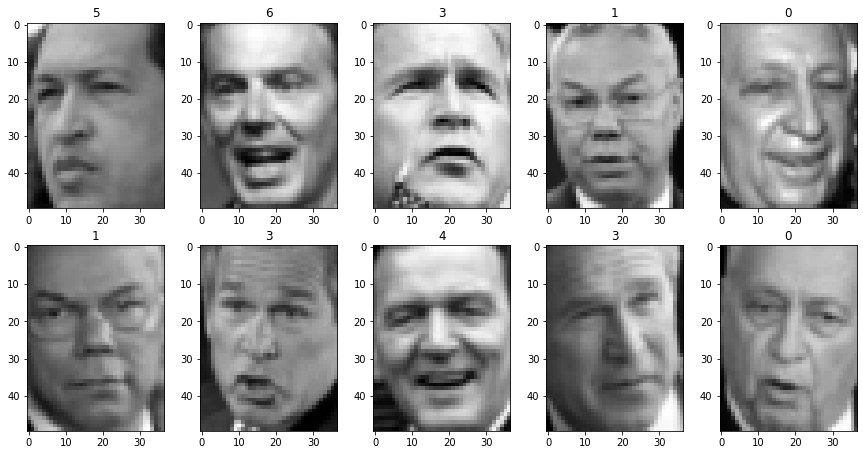

In [49]:
from matplotlib import pyplot as plt
plt.figure()
fig,ax=plt.subplots(2,5)      
fig.set_figheight(7.5)     
fig.set_figwidth(15)       
ax=ax.flatten()            
for i in range(10):
    ax[i].imshow(lfw_people.images[i,:,:],cmap ='gray') 
    ax[i].set_title(lfw_people.target[i])  
plt.show()

In [25]:
X = lfw_people.data
X.shape

(1288, 1850)

In [27]:
n_features = X.shape[1]

In [29]:
y = lfw_people.target

In [32]:
target_names = lfw_people.target_names
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [33]:
n_classes = target_names.shape[0]

In [34]:
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [ ]:
from matplotlib import pyplot as plt
import numpy as np

plt.figure()
fig,ax = plt.subplots(2,5) #画布分成2行5列 
fig.set_figheight(6)       #高度为6
fig.set_figwidth(15)       #宽度为15
ax=ax.flatten()            #拉成一维
X,Y=next(validation_generator) #从验证数据生成器中，生成一批，作为X,Y
for i in range(10): 
    ax[i].imshow(X[i,:,:,:])   #显示图片
    ax[i].set_title(np.argmax(Y[i]))     #标题为其类别
plt.show()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [37]:
n_components=150
print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces=pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

Extracting the top 150 eigenfaces from 966 faces
done in 0.219s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.028s


In [39]:
# 训练SVM分类模型
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 34.355s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.005)


In [40]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

Predicting people's names on the test set
done in 0.070s
                   precision    recall  f1-score   support

     Ariel Sharon       0.86      0.46      0.60        13
     Colin Powell       0.81      0.87      0.84        60
  Donald Rumsfeld       0.90      0.70      0.79        27
    George W Bush       0.84      0.98      0.91       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       0.89      0.53      0.67        15
       Tony Blair       0.97      0.81      0.88        36

         accuracy                           0.86       322
        macro avg       0.89      0.74      0.79       322
     weighted avg       0.87      0.86      0.85       322

[[  6   1   0   6   0   0   0]
 [  1  52   1   5   0   1   0]
 [  0   1  19   7   0   0   0]
 [  0   3   0 143   0   0   0]
 [  0   1   0   3  20   0   1]
 [  0   4   0   2   1   8   0]
 [  0   2   1   4   0   0  29]]


In [41]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

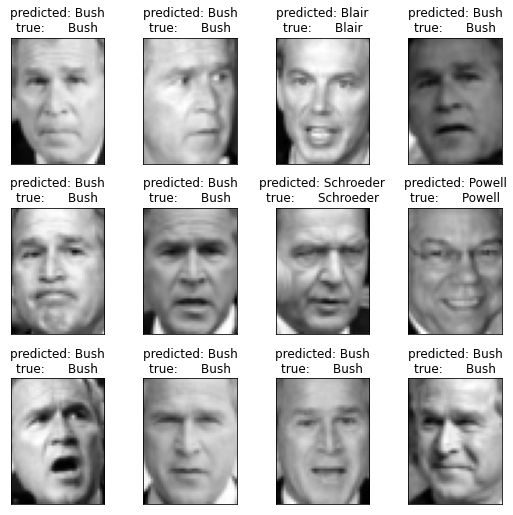

In [42]:
# 绘制部分测试集的预测结果
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

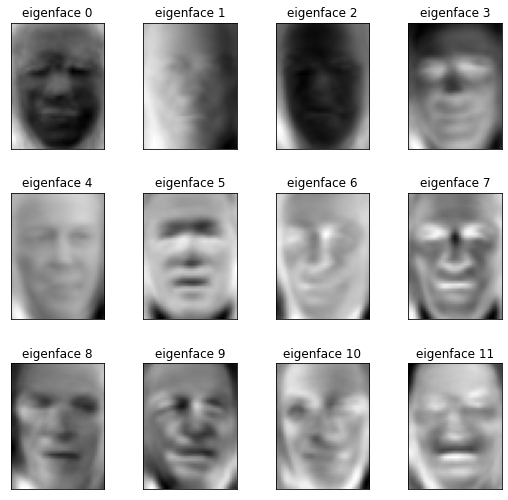

In [43]:
# 绘制几个最重要的特征脸的相册
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()